<a href="https://colab.research.google.com/github/maffant20/Deep-Learning-Project/blob/main/DL_Proj_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries Import
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [ ]:
train_set, test_set = tfds.load('so2sat/rgb', split=['train', 'validation'])
# train_set, test_set = tfds.load('so2sat/rgb', split=['train', 'validation'], batch_size = -1)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling ~/tensorflow_datasets/so2sat/rgb/2.1.0.incomplete1CPKCO/so2sat-train.tfrecord*...:   0%|          | …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling ~/tensorflow_datasets/so2sat/rgb/2.1.0.incomplete1CPKCO/so2sat-validation.tfrecord*...:   0%|       …

Dataset so2sat downloaded and prepared to ~/tensorflow_datasets/so2sat/rgb/2.1.0. Subsequent calls will reuse this data.


In [ ]:
LABELS = [
    'Compact high-rise', 'Compact mid-rise', 'Compact low-rise',
    'Open high-rise', 'Open mid-rise', 'Open low-rise', 'Lightweight low-rise',
    'Large low-rise', 'Sparsely built', 'Heavy industry', 'Dense trees',
    'Scattered trees', 'Bush or scrub', 'Low plants', 'Bare rock or paved',
    'Bare soil or sand', 'Water'
]

In [ ]:
print('Training Set Type:', type(train_set)) 
print('Test Set Type:', type(test_set))

Training Set Type: <class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
Test Set Type: <class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [ ]:
print(train_set)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sample_id': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [ ]:
 X_train= []
 Y_train=[]
# X_train = train_set['image']
# Y_train = train_set['label']
 X_test = []
 Y_test = []
# X_test = test_set['image']
# Y_test = test_set['label']

i=0
j=0
for  exp in train_set:
  image, label = exp['image'], exp['label']
  X_train.append(image)
  # plt.figure(figsize = (20,4))
  # plt.imshow(image)
  Y_train.append(label)
  # plt.show()
  # print('label =', label)
  print ('Train_Image No:', i)
  i += 1
  
for  exp in test_set:
  image, label = exp["image"], exp["label"]
  X_test.append(image)
  # plt.figure(figsize = (20,4))
  # plt.imshow(image)
  Y_test.append(label)
  # plt.show()
  # print('label =', label)
  print('Test Image No.: ', j)
  j += 1
print(type(X_train))
print(type(Y_train))

Streaming output truncated to the last 5000 lines.
Test Image No.:  19121
Test Image No.:  19122
Test Image No.:  19123
Test Image No.:  19124
Test Image No.:  19125
Test Image No.:  19126
Test Image No.:  19127
Test Image No.:  19128
Test Image No.:  19129
Test Image No.:  19130
Test Image No.:  19131
Test Image No.:  19132
Test Image No.:  19133
Test Image No.:  19134
Test Image No.:  19135
Test Image No.:  19136
Test Image No.:  19137
Test Image No.:  19138
Test Image No.:  19139
Test Image No.:  19140
Test Image No.:  19141
Test Image No.:  19142
Test Image No.:  19143
Test Image No.:  19144
Test Image No.:  19145
Test Image No.:  19146
Test Image No.:  19147
Test Image No.:  19148
Test Image No.:  19149
Test Image No.:  19150
Test Image No.:  19151
Test Image No.:  19152
Test Image No.:  19153
Test Image No.:  19154
Test Image No.:  19155
Test Image No.:  19156
Test Image No.:  19157
Test Image No.:  19158
Test Image No.:  19159
Test Image No.:  19160
Test Image No.:  19161
Test I

In [ ]:
print('No. of images', len(X_train))
print('No. of labels', len(Y_train))


No. of images 352366
No. of labels 352366


In [ ]:
print('No. of images', len(X_test))
print('No. of labels', len(Y_test))

No. of images 24119
No. of labels 24119


In [ ]:
j =0
for i in Y_test:
  
  print (i)
  j += 1
  if j == 30 :
    break
print(' adawaraafsef')
j =0

for i in Y_train:
  
  print (i)
  j += 1
  if j == 30 :
    break    

tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(1, shape

In [ ]:
for i in range(len(X_train)):
  X_train[i] = X_train[i].numpy()
for i in range(len(X_test)):
  X_test[i] = X_test[i].numpy()
for i in range(len(Y_train)):
  Y_train[i] = Y_train[i].numpy()
for i in range(len(Y_test)):
  Y_test[i] = Y_test[i].numpy()


In [ ]:


X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)  
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Y_train = tf.keras.utils.to_categorical(Y_train)
# Y_test = tf.keras.utils.to_categorical(Y_test)
# Training_Data = ImageDataGenerator(rescale=1/255.0).flow(X_train,Y_train,batch_size=256)
# Testing_Data = ImageDataGenerator(rescale=1/255.0).flow(X_test,Y_test,batch_size=64)

print(X_train)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(Y_train.shape)
print(Y_train[0])
# print(Training_Data)

(352366, 32, 32, 3)
(352366,)
(24119, 32, 32, 3)
(24119,)
[[[[229 194 177]
   [229 194 177]
   [174 161 149]
   ...
   [181 158 158]
   [187 168 158]
   [165 149 150]]

  [[225 184 173]
   [225 184 173]
   [194 164 166]
   ...
   [170 153 154]
   [194 169 164]
   [168 145 153]]

  [[207 177 171]
   [207 177 171]
   [211 178 174]
   ...
   [174 158 154]
   [192 163 162]
   [163 150 152]]

  ...

  [[161 144 144]
   [183 157 162]
   [149 146 146]
   ...
   [169 152 154]
   [182 155 161]
   [182 155 161]]

  [[148 135 141]
   [170 159 155]
   [162 142 149]
   ...
   [151 142 145]
   [156 144 147]
   [156 144 147]]

  [[145 135 140]
   [170 153 150]
   [159 144 149]
   ...
   [131 132 135]
   [131 132 135]
   [155 139 145]]]


 [[[ 54  62  76]
   [ 53  64  76]
   [ 59  65  75]
   ...
   [ 53  58  73]
   [ 50  58  72]
   [ 44  56  70]]

  [[ 58  64  75]
   [ 59  66  75]
   [ 58  64  76]
   ...
   [ 51  58  73]
   [ 45  55  70]
   [ 43  56  72]]

  [[ 55  63  75]
   [ 60  64  78]
   [ 61  64

In [ ]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]
print(X_train)
print(Y_train)
print('saadfsf')
print(X_test)
print(Y_test)

[[[[0.8980392  0.7607843  0.69411767]
   [0.8980392  0.7607843  0.69411767]
   [0.68235296 0.6313726  0.58431375]
   ...
   [0.70980394 0.61960787 0.61960787]
   [0.73333335 0.65882355 0.61960787]
   [0.64705884 0.58431375 0.5882353 ]]

  [[0.88235295 0.72156864 0.6784314 ]
   [0.88235295 0.72156864 0.6784314 ]
   [0.7607843  0.6431373  0.6509804 ]
   ...
   [0.6666667  0.6        0.6039216 ]
   [0.7607843  0.6627451  0.6431373 ]
   [0.65882355 0.5686275  0.6       ]]

  [[0.8117647  0.69411767 0.67058825]
   [0.8117647  0.69411767 0.67058825]
   [0.827451   0.69803923 0.68235296]
   ...
   [0.68235296 0.61960787 0.6039216 ]
   [0.7529412  0.6392157  0.63529414]
   [0.6392157  0.5882353  0.59607846]]

  ...

  [[0.6313726  0.5647059  0.5647059 ]
   [0.7176471  0.6156863  0.63529414]
   [0.58431375 0.57254905 0.57254905]
   ...
   [0.6627451  0.59607846 0.6039216 ]
   [0.7137255  0.60784316 0.6313726 ]
   [0.7137255  0.60784316 0.6313726 ]]

  [[0.5803922  0.5294118  0.5529412 ]
   [0.6

[[[[0.8980392  0.7607843  0.69411767]
   [0.8980392  0.7607843  0.69411767]
   [0.68235296 0.6313726  0.58431375]
   ...
   [0.70980394 0.61960787 0.61960787]
   [0.73333335 0.65882355 0.61960787]
   [0.64705884 0.58431375 0.5882353 ]]

  [[0.88235295 0.72156864 0.6784314 ]
   [0.88235295 0.72156864 0.6784314 ]
   [0.7607843  0.6431373  0.6509804 ]
   ...
   [0.6666667  0.6        0.6039216 ]
   [0.7607843  0.6627451  0.6431373 ]
   [0.65882355 0.5686275  0.6       ]]

  [[0.8117647  0.69411767 0.67058825]
   [0.8117647  0.69411767 0.67058825]
   [0.827451   0.69803923 0.68235296]
   ...
   [0.68235296 0.61960787 0.6039216 ]
   [0.7529412  0.6392157  0.63529414]
   [0.6392157  0.5882353  0.59607846]]

  ...

  [[0.6313726  0.5647059  0.5647059 ]
   [0.7176471  0.6156863  0.63529414]
   [0.58431375 0.57254905 0.57254905]
   ...
   [0.6627451  0.59607846 0.6039216 ]
   [0.7137255  0.60784316 0.6313726 ]
   [0.7137255  0.60784316 0.6313726 ]]

  [[0.5803922  0.5294118  0.5529412 ]
   [0.6

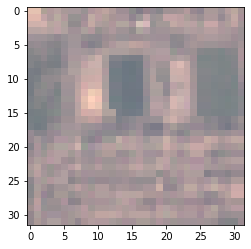

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0.21176471 0.24313726 0.29803923]
  [0.20784314 0.2509804  0.29803923]
  [0.23137255 0.25490198 0.29411766]
  ...
  [0.20784314 0.22745098 0.28627452]
  [0.19607843 0.22745098 0.28235295]
  [0.17254902 0.21960784 0.27450982]]

 [[0.22745098 0.2509804  0.29411766]
  [0.23137255 0.25882354 0.29411766]
  [0.22745098 0.2509804  0.29803923]
  ...
  [0.2        0.22745098 0.28627452]
  [0.1764706  0.21568628 0.27450982]
  [0.16862746 0.21960784 0.28235295]]

 [[0.21568628 0.24705882 0.29411766]
  [0.23529412 0.2509804  0.30588236]
  [0.23921569 0.2509804  0.3019608 ]
  ...
  [0.2        0.22745098 0.28627452]
  [0.17254902 0.21568628 0.2784314 ]
  [0.16862746 0.21960784 0.28235295]]

 ...

 [[0.13725491 0.19607843 0.25882354]
  [0.12941177 0.19215687 0.25882354]
  [0.13333334 0.2        0.25882354]
  ...
  [0.14117648 0.2        0.25882354]
  [0.13333334 0.19215687 0.25882354]
  [0.13333334 0.19215687 0.25882354]]

 [[0.14509805 0.2    

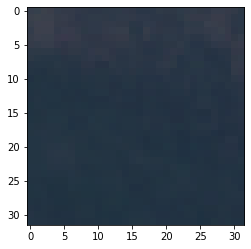

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[[0.25490198 0.3019608  0.34901962]
  [0.2901961  0.33333334 0.36862746]
  [0.33333334 0.3372549  0.39607844]
  ...
  [0.46666667 0.45490196 0.5254902 ]
  [0.4745098  0.44705883 0.50980395]
  [0.4509804  0.4392157  0.49019608]]

 [[0.29411766 0.3254902  0.37254903]
  [0.28627452 0.32156864 0.36078432]
  [0.24705882 0.32941177 0.3529412 ]
  ...
  [0.49019608 0.49019608 0.5137255 ]
  [0.49019608 0.49803922 0.5294118 ]
  [0.49019608 0.46666667 0.5254902 ]]

 [[0.25882354 0.3254902  0.34509805]
  [0.28235295 0.32941177 0.36078432]
  [0.30980393 0.36078432 0.3882353 ]
  ...
  [0.43137255 0.41568628 0.4862745 ]
  [0.42352942 0.42352942 0.4862745 ]
  [0.38431373 0.42352942 0.45490196]]

 ...

 [[0.15294118 0.20784314 0.3137255 ]
  [0.15294118 0.20784314 0.30588236]
  [0.14901961 0.20392157 0.3019608 ]
  ...
  [0.14509805 0.21176471 0.3137255 ]
  [0.12156863 0.18431373 0.29803923]
  [0.10588235 0.1764706  0.28627452]]

 [[0.15686275 0.21176

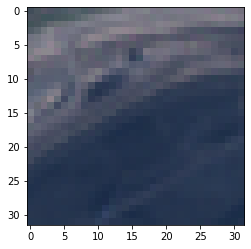

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[[[0.16078432 0.23921569 0.34117648]
  [0.16470589 0.24705882 0.3529412 ]
  [0.15686275 0.24313726 0.34509805]
  ...
  [0.15686275 0.23137255 0.34117648]
  [0.15294118 0.22745098 0.33333334]
  [0.14901961 0.22745098 0.3372549 ]]

 [[0.15686275 0.23137255 0.33333334]
  [0.16862746 0.23921569 0.34509805]
  [0.16078432 0.23137255 0.34117648]
  ...
  [0.14901961 0.23137255 0.34117648]
  [0.14117648 0.23137255 0.32941177]
  [0.14901961 0.22745098 0.3372549 ]]

 [[0.14901961 0.22352941 0.32941177]
  [0.14117648 0.22352941 0.33333334]
  [0.13725491 0.21568628 0.3372549 ]
  ...
  [0.14117648 0.22745098 0.33333334]
  [0.14117648 0.22352941 0.33333334]
  [0.14901961 0.22352941 0.3372549 ]]

 ...

 [[0.13725491 0.21960784 0.3372549 ]
  [0.13725491 0.21960784 0.3372549 ]
  [0.13333334 0.21568628 0.3254902 ]
  ...
  [0.15294118 0.23529412 0.34117648]
  [0.15294118 0.23529412 0.34117648]
  [0.15294118 0.23137255 0.34117648]]

 [[0.13725491 0.22352

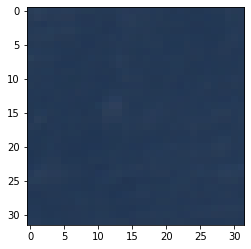

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[[[0.4627451  0.44705883 0.49803922]
  [0.5137255  0.50980395 0.5058824 ]
  [0.5137255  0.50980395 0.5058824 ]
  ...
  [0.54901963 0.56078434 0.5372549 ]
  [0.54901963 0.54901963 0.54509807]
  [0.54509807 0.5411765  0.5372549 ]]

 [[0.40392157 0.4117647  0.45882353]
  [0.4627451  0.53333336 0.5058824 ]
  [0.4627451  0.53333336 0.5058824 ]
  ...
  [0.59607846 0.5529412  0.5529412 ]
  [0.5647059  0.54509807 0.54901963]
  [0.5764706  0.5803922  0.56078434]]

 [[0.42745098 0.45490196 0.45490196]
  [0.5176471  0.45882353 0.47843137]
  [0.5176471  0.45882353 0.47843137]
  ...
  [0.58431375 0.5803922  0.5686275 ]
  [0.54509807 0.5294118  0.5411765 ]
  [0.49411765 0.49411765 0.5176471 ]]

 ...

 [[0.5372549  0.49411765 0.5294118 ]
  [1.         0.84705883 0.7254902 ]
  [0.93333334 0.7647059  0.7019608 ]
  ...
  [0.5686275  0.54509807 0.54509807]
  [0.59607846 0.5568628  0.5803922 ]
  [0.62352943 0.6117647  0.5686275 ]]

 [[0.54509807 0.54117

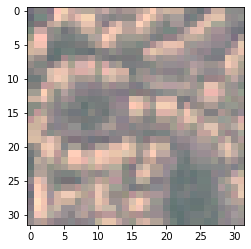

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(X_train)
for i in range(5):
  print(X_train[i])
  plt.figure(figsize = (20,4))
  plt.imshow(X_train[i])
  plt.show()
  print(Y_train[i])


In [ ]:
# print(type(training_data))
print(X_train)
print(Y_train)

[[[[0.8980392  0.7607843  0.69411767]
   [0.8980392  0.7607843  0.69411767]
   [0.68235296 0.6313726  0.58431375]
   ...
   [0.70980394 0.61960787 0.61960787]
   [0.73333335 0.65882355 0.61960787]
   [0.64705884 0.58431375 0.5882353 ]]

  [[0.88235295 0.72156864 0.6784314 ]
   [0.88235295 0.72156864 0.6784314 ]
   [0.7607843  0.6431373  0.6509804 ]
   ...
   [0.6666667  0.6        0.6039216 ]
   [0.7607843  0.6627451  0.6431373 ]
   [0.65882355 0.5686275  0.6       ]]

  [[0.8117647  0.69411767 0.67058825]
   [0.8117647  0.69411767 0.67058825]
   [0.827451   0.69803923 0.68235296]
   ...
   [0.68235296 0.61960787 0.6039216 ]
   [0.7529412  0.6392157  0.63529414]
   [0.6392157  0.5882353  0.59607846]]

  ...

  [[0.6313726  0.5647059  0.5647059 ]
   [0.7176471  0.6156863  0.63529414]
   [0.58431375 0.57254905 0.57254905]
   ...
   [0.6627451  0.59607846 0.6039216 ]
   [0.7137255  0.60784316 0.6313726 ]
   [0.7137255  0.60784316 0.6313726 ]]

  [[0.5803922  0.5294118  0.5529412 ]
   [0.6

In [ ]:
def cnn():

  cnn = models.Sequential([layers.Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding ='same',kernel_initializer='he_uniform',strides=1, input_shape=(32,32,3)),
                         layers.BatchNormalization(),
                         layers.MaxPooling2D((2,2),padding='same'),
                         layers.Conv2D(filters = 64, kernel_size= (7,7), kernel_initializer='he_uniform',strides=1, padding ='same', activation = 'relu'),
                         layers.BatchNormalization(),
                         layers.MaxPooling2D((2,2), padding='same'),  
                         layers.Conv2D(filters = 128, kernel_size = (3, 3), activation='relu',strides=1,kernel_initializer='he_uniform',  padding='same'),                       
                         layers.BatchNormalization(),
                         layers.MaxPooling2D((2,2), padding='same'),  
                         layers.Conv2D(filters = 64, kernel_size= (3,3),  padding ='same',strides=1,kernel_initializer='he_uniform', activation = 'relu'),
                         layers.MaxPooling2D((2,2),padding='same'),
                         layers.BatchNormalization(),
                         layers.Conv2D(filters = 64, kernel_size= (9,9),  padding ='same',strides=1,kernel_initializer='he_uniform', activation = 'relu'),
                         layers.BatchNormalization(),
                         layers.MaxPooling2D((2,2),padding='same'),
                         layers.Conv2D(filters = 64, kernel_size= (7,7),  padding ='same',strides=1,kernel_initializer='he_uniform', activation = 'relu'),
                         layers.BatchNormalization(),
                         layers.MaxPooling2D((2,2), padding='same'),
                         layers.Flatten(),
                         layers.Dense(1000, activation = 'relu', use_bias =False),
                         layers.BatchNormalization(),
                         layers.Dense(17, activation = 'softmax')
])
  cnn.compile(tf.keras.optimizers.Adam(learning_rate = 0.003),
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])
 

  return cnn





In [ ]:
cnn= cnn()
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        100416    
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                        

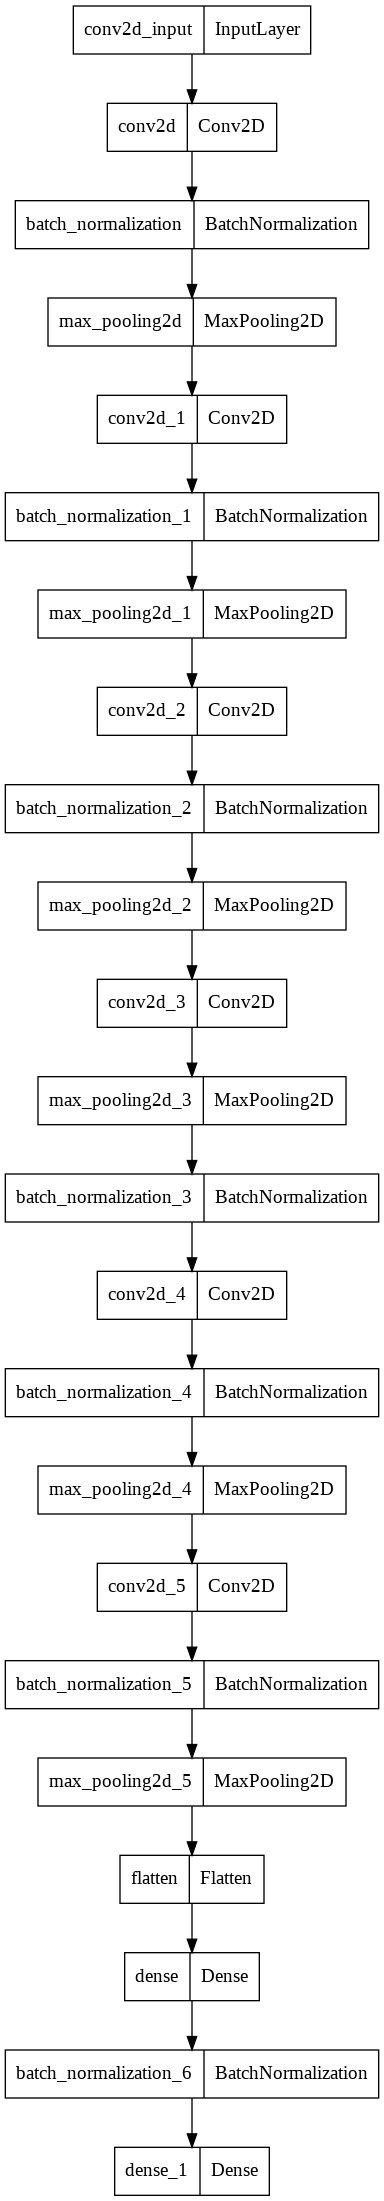

In [ ]:
from keras.utils import plot_model
plot_model(cnn, to_file = 'cnn.png')

In [ ]:
# from sklearn.utils import shuffle
# x,y = shuffle(X_train, Y_train, random_state=2)
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5, shuffle=False)

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
#     height_shift_range=0.1, shear_range=0.2, 
#     zoom_range=0.2,horizontal_flip=True, 
#     fill_mode="nearest")

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import precision_score, recall_score
losses = []
accuracies = []
precision_list = []
recall_list = []

file_path = '/content/drive/MyDrive/DL Project Part 1 ' 
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="loss",
                                                      mode = 'min',
                                                      save_best_only = True,
                                                      verbose = 0,
                                                      filepath=file_path)
early = EarlyStopping(monitor="loss", mode="min", patience=8)
callbacks_list = [Checkpoint_Model, early]
# cnn = cnn()
rounded_labels=np.argmax(Y_test, axis=1)
hist = cnn.fit(X_train, Y_train, validation_split = 0.2,
                         epochs = 2,  verbose = True)


y_pred = np.argmax(cnn.predict(X_test), axis = 1)
precision_list.append(precision_score(rounded_labels, y_pred, 
                                           average='micro'))
recall_list.append(recall_score(rounded_labels, y_pred,
                                           average='micro'))

hist = cnn.fit(X_train, Y_train, validation_split = 0.2,
                         epochs = 2,  verbose = True)

y_pred = np.argmax(cnn.predict(X_test), axis = 1)
precision_list.append(precision_score(rounded_labels, y_pred,
                                           average='micro'))
recall_list.append(recall_score(rounded_labels, y_pred,
                                           average='micro'))




hist = cnn.fit(X_train, Y_train, validation_split = 0.2, 
                         epochs = 3, callbacks=callbacks_list, verbose = True)

y_pred = np.argmax(cnn.predict(X_test), axis = 1)
precision_list.append(precision_score(rounded_labels, y_pred,
                                           average='micro'))
recall_list.append(recall_score(rounded_labels, y_pred,
                                           average='micro'))


cnn.load_weights(file_path)
score = cnn.evaluate(X_test,Y_test, verbose = 1)
Y_pred = cnn.predict(X_test)
losses.append(score[0])
accuracies.append(score[1])
# print('Training Loss and Accuracy')
# import pandas as pd
# pd.# plt.show()

Epoch 1/2
8810/8810 [==============================] - 2537s 288ms/step - loss: 1.1576 - accuracy: 0.6199 - val_loss: 1.6905 - val_accuracy: 0.5243
Epoch 2/2
754/754 [==============================] - 52s 68ms/step
Epoch 1/2
8810/8810 [==============================] - 2537s 288ms/step - loss: 0.7060 - accuracy: 0.7600 - val_loss: 1.5765 - val_accuracy: 0.5649
Epoch 2/2
754/754 [==============================] - 46s 61ms/step
Epoch 1/3
8810/8810 [==============================] - 2551s 290ms/step - loss: 0.5814 - accuracy: 0.8017 - val_loss: 1.5388 - val_accuracy: 0.6063
Epoch 2/3
8810/8810 [==============================] - 2549s 289ms/step - loss: 0.5378 - accuracy: 0.8154 - val_loss: 0.9197 - val_accuracy: 0.6932
Epoch 3/3
754/754 [==============================] - 47s 62ms/step


In [ ]:
print('Accuracy :', accuracies)
print('Loss :', losses)


Accuracy : [0.5083544254302979]
Loss : [6.33377742767334]


<Figure size 432x288 with 0 Axes>

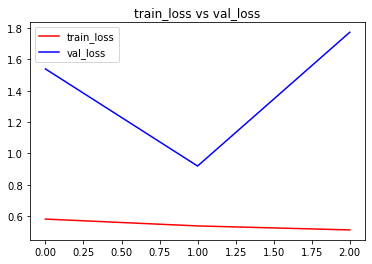

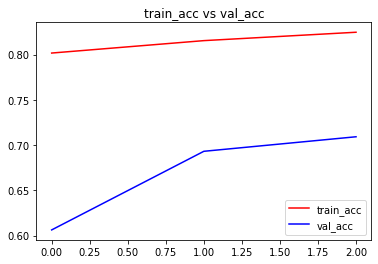

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [ ]:
cnn.save_weights('cnn_weights.h5')
cnn.save('cnn.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
results = np.argmax(cnn.predict(X_test), axis = 1)
# results = (cnn.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(np.where(Y_test==1)[1], results)


# cm = confusion_matrix(X_test.classes, y_classes)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


# disp.plot(cmap=plt.cm.Blues)
# plt.show();

754/754 [==============================] - 47s 63ms/step


In [ ]:
import seaborn as sns
import pandas as pd


In [ ]:
cm_df = pd.DataFrame(cm, index = LABELS, columns= LABELS)


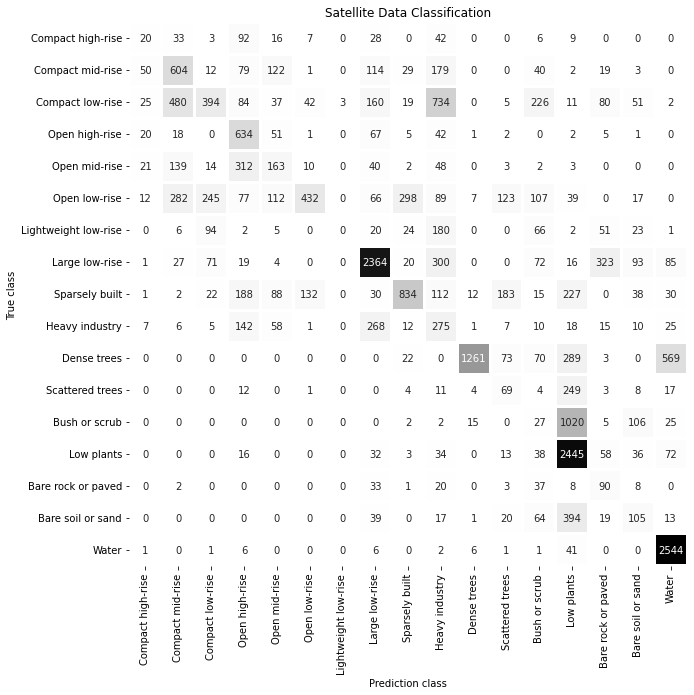

In [ ]:
final_cm = cm_df
plt.figure(figsize = (10,10))
sns.heatmap(final_cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('Satellite Data Classification')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [ ]:
from sklearn.metrics import  classification_report
# y_pred = cnn.predict(X_test)

# print(y_pred[:5])
Y_pred_classes = [np.argmax(element) for element in Y_pred]
# cm = confusion_matrix()
rounded_labels=np.argmax(Y_test, axis=1)
print('classification Report: \n', classification_report(rounded_labels,Y_pred_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.13      0.08      0.10       256
           1       0.38      0.48      0.42      1254
           2       0.46      0.17      0.25      2353
           3       0.38      0.75      0.50       849
           4       0.25      0.22      0.23       757
           5       0.69      0.23      0.34      1906
           6       0.00      0.00      0.00       474
           7       0.72      0.70      0.71      3395
           8       0.65      0.44      0.52      1914
           9       0.13      0.32      0.19       860
          10       0.96      0.55      0.70      2287
          11       0.14      0.18      0.16       382
          12       0.03      0.02      0.03      1202
          13       0.51      0.89      0.65      2747
          14       0.13      0.45      0.21       202
          15       0.21      0.16      0.18       672
          16       0.75      0.98      0.85      2609

 

In [ ]:
from sklearn.metrics import roc_curve,auc
from itertools import cycle

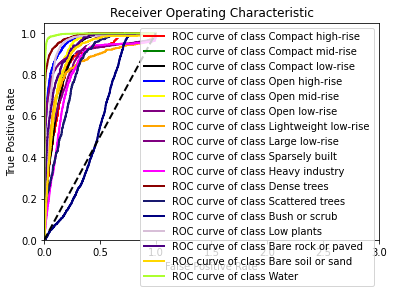

<Figure size 720x720 with 0 Axes>

In [ ]:
classes = 17
Y_pred_ravel = Y_pred.ravel()
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(classes):
  fpr[i], tpr[i],_ = roc_curve(Y_test[:,i], Y_pred[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle([ 
    'red', 'green','black','blue', 'yellow','purple','orange','purple', 'white', 'magenta', 
    'darkred', 'midnightblue', 'navy', 'thistle', 'indigo', 'gold','greenyellow'

])

for i, color in zip(range(classes), colors):
  plt.plot(fpr[i],tpr[i], color=color, lw=2, label='ROC curve of class {0}'''.format(LABELS[i]) )


# f.set_figwidth(4)
# f.set_figheight(4)  
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0, 3.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="best")
plt.figure(figsize= (10,10))
plt.show()



In [ ]:
precision_list

[0.4184253078485841, 0.45333554459140096, 0.5083544093867906]

In [ ]:
recall_list

[0.4184253078485841, 0.45333554459140096, 0.5083544093867906]